In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
sns.set(style="dark")
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
df1 = pd.read_csv('./Dataset_FireWatch_Brazil_Q1_2024.csv')
df2 = pd.read_csv('./Dataset_FireWatch_Brazil_Q2_2024.csv')
df3 = pd.read_csv('./Dataset_FireWatch_Brazil_Q3_2024.csv')

In [4]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [5]:
df['data'] = pd.to_datetime(df['data'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162093 entries, 0 to 162092
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   data                       162093 non-null  datetime64[ns]
 1   municipio                  162093 non-null  object        
 2   estado                     162093 non-null  object        
 3   bioma                      162092 non-null  object        
 4   avg_numero_dias_sem_chuva  162093 non-null  float64       
 5   avg_precipitacao           162093 non-null  float64       
 6   avg_risco_fogo             162093 non-null  float64       
 7   avg_frp                    162089 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 9.9+ MB


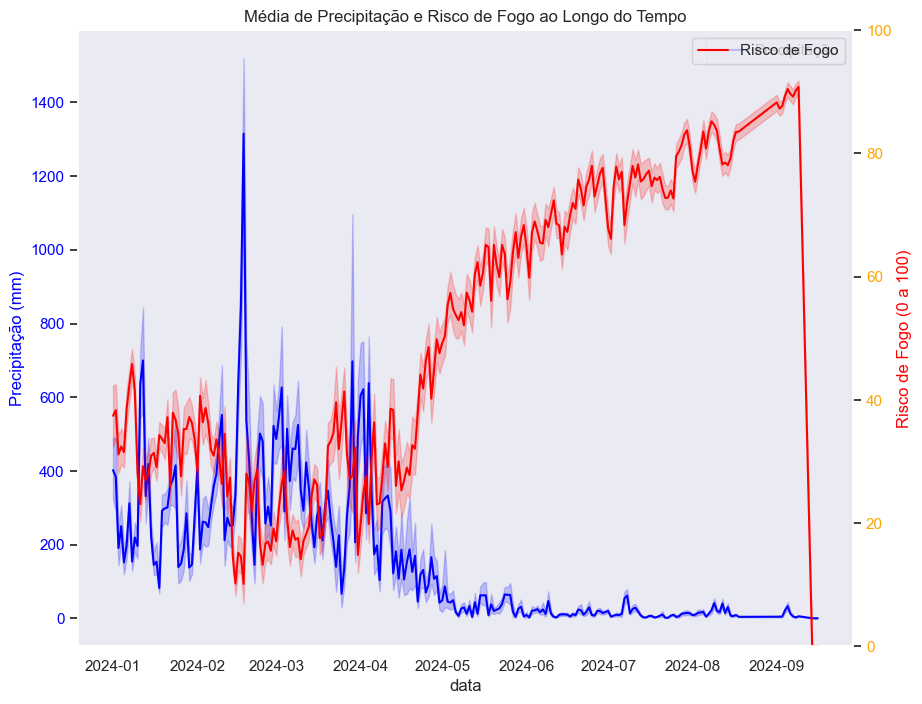

In [82]:
# Grafico de comparação entre a precipitação e o risco de fogo
# Configuração do gráfico
fig, ax1 = plt.subplots()

# Plotando a primeira linha (precipitação)
sns.lineplot(x='data', y='avg_precipitacao', data=df, ax=ax1, label='Precipitação', color='blue')
ax1.set_ylabel('Precipitação (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo Y para o risco de fogo
ax2 = ax1.twinx()
sns.lineplot(x='data', y='avg_risco_fogo', data=df, ax=ax2, label='Risco de Fogo', color='red')
ax2.set_ylabel('Risco de Fogo (0 a 100)', color='red')
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustes do gráfico
plt.title("Média de Precipitação e Risco de Fogo ao Longo do Tempo")
ax2.set_ylim(0, 100)  # Aumentando a escala do eixo Y do risco de fogo

# Exibindo o gráfico
plt.show()

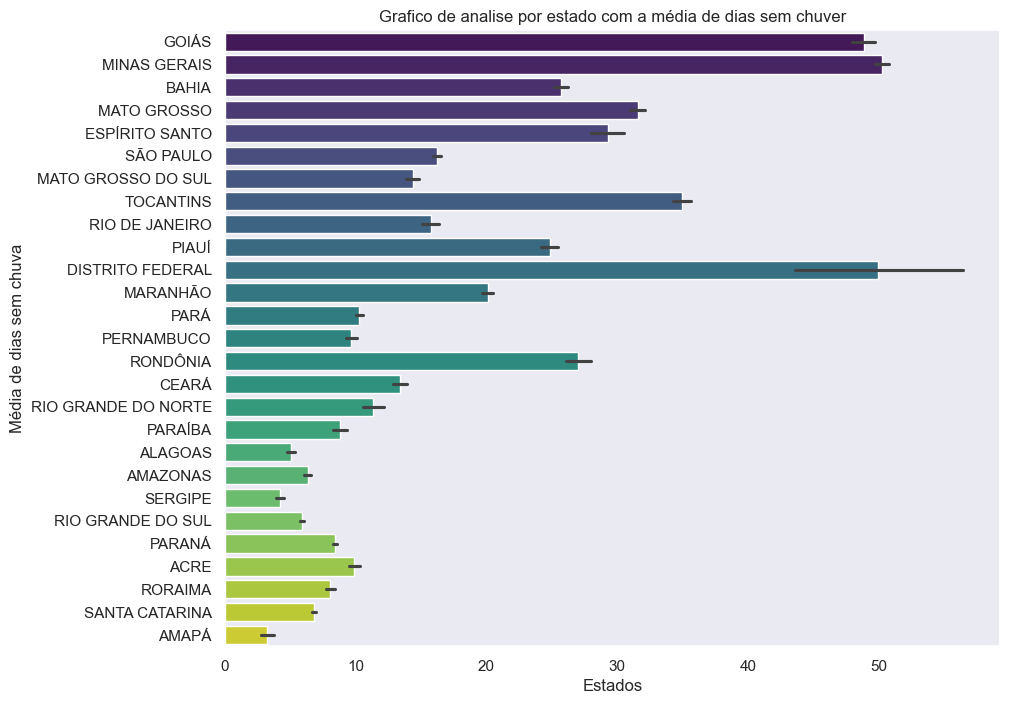

In [92]:
# Grafico de analise por estado com a média de dias sem chuver
sns.barplot(y='estado', x='avg_numero_dias_sem_chuva', data=df, palette='viridis', hue='estado', legend=False)
# Ajustes do gráfico
plt.title("Grafico de analise por estado com a média de dias sem chuver")
plt.xlabel("Estados")
plt.ylabel("Média de dias sem chuva")
plt.show()